In [1]:
import pandas as pd
import numpy as np

In [30]:
sel=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/sel_sp.csv')
cus=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/cus_sp.csv')
df=pd.read_csv('/Users/rae/Desktop/datasets 2/Brazil/df.csv')

In [31]:
dfgeo=df[['order_id','customer_unique_id','seller_id','time_dif','review_score']].copy()
dfgeo.head()

,order_id,customer_unique_id,seller_id,time_dif,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,4
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,4
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,4
3,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,3504c0cb71d7fa48d967e0e4c94d59d9,2.0,4
4,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,3504c0cb71d7fa48d967e0e4c94d59d9,5.0,5


In [32]:
dfgeo=pd.merge(dfgeo,cus,on='customer_unique_id')
dfgeo=pd.merge(dfgeo,sel,on='seller_id')
dfgeo=dfgeo[['order_id','customer_unique_id','seller_id','time_dif',
            'lat1','lng1','lat2','lng2','review_score']].copy()
dfgeo.head()

,order_id,customer_unique_id,seller_id,time_dif,lat1,lng1,lat2,lng2,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,-23.680114,-46.452454,-23.574809,-46.587471,4
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,-23.680114,-46.452454,-23.574809,-46.587471,4
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,-23.680114,-46.452454,-23.574809,-46.587471,4
3,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,-23.680114,-46.452454,-23.574809,-46.587471,4
4,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,3504c0cb71d7fa48d967e0e4c94d59d9,8.0,-23.680114,-46.452454,-23.574809,-46.587471,4


In [33]:
dfgeo=dfgeo.drop_duplicates(subset=['order_id'],keep='first')
dfgeo.head().T

,0,1242,1449,1656,1863
order_id,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,bfc39df4f36c3693ff3b63fcbea9e90a,5f49f31e537f8f1a496454b48edbe34d
customer_unique_id,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,e781fdcc107d13d865fc7698711cc572,7a1de9bde89aedca8c5fbad489c5571c
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9
time_dif,8.0,2.0,5.0,14.0,4.0
lat1,-23.680114,-23.680114,-23.680114,-23.680114,-23.680114
lng1,-46.452454,-46.452454,-46.452454,-46.452454,-46.452454
lat2,-23.574809,-23.565578,-23.543295,-27.536913,-23.552593
lng2,-46.587471,-46.534603,-46.630743,-48.509018,-46.640683
review_score,4,4,5,3,1


In [34]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [35]:
dfgeo.loc[:, 'distance_haversine'] = haversine_array(
    dfgeo['lat1'].values, dfgeo['lng1'].values, 
    dfgeo['lat2'].values, dfgeo['lng2'].values)

In [36]:
dfgeo['deliver_speed']=dfgeo['distance_haversine'].values/dfgeo['time_dif'].values
dfgeo.head().T

/var/folders/gd/_wrh1tk54c34q8nmkvt1wj5w0000gn/T/ipykernel_75232/1417522883.py:1: RuntimeWarning: divide by zero encountered in true_divide
  dfgeo['deliver_speed']=dfgeo['distance_haversine'].values/dfgeo['time_dif'].values


,0,1242,1449,1656,1863
order_id,e481f51cbdc54678b7cc49136f2d6af7,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,bfc39df4f36c3693ff3b63fcbea9e90a,5f49f31e537f8f1a496454b48edbe34d
customer_unique_id,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,e781fdcc107d13d865fc7698711cc572,7a1de9bde89aedca8c5fbad489c5571c
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9
time_dif,8.0,2.0,5.0,14.0,4.0
lat1,-23.680114,-23.680114,-23.680114,-23.680114,-23.680114
lng1,-46.452454,-46.452454,-46.452454,-46.452454,-46.452454
lat2,-23.574809,-23.565578,-23.543295,-27.536913,-23.552593
lng2,-46.587471,-46.534603,-46.630743,-48.509018,-46.640683
review_score,4,4,5,3,1
distance_haversine,18.063837,15.239595,23.694467,475.830735,23.850187


In [29]:
import seaborn as sns
%matplotlib inline

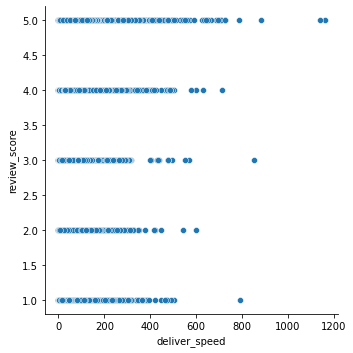

In [38]:
sns.relplot(data=dfgeo,x='deliver_speed',y='review_score')

In [39]:
dfgeo.to_csv('/Users/rae/Desktop/datasets 2/Brazil/dfgeo.csv')